SHOPS CUSTOMER SALES DATA

Features:
- Store ID
- Day of the week
- Date
- Number of customers that day 
- Open: If the store was open (1), if the store was closed (0)
- Promotion: 1 if promotion was active
- State Holidas 
- School Holidays
- Total Sales 

What do we want to achieve?
1) Prediction of the sales of the Shops --> ML model to predict the sales using features like day of the week, promotions, holidays etc.
2) Apply different models: Liniar Regression, decision tree, KNN, Random forest and analyzed which one is best for our model.  
2) Visualization 

First, we´ll analyzed LINIAR REGRESSION MODEL 

1. Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

2. Loading data

In [80]:
df = pd.read_csv("sales_data_updated.csv")

In [81]:
df = pd.read_csv("sales_data_updated.csv")
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,2015-03-01,0,0,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,0
3,77556,683,2,2013-01-29,862,1,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,0


3. Cleaning the data

In [82]:
df = df[df['open'] == 1].copy()
df.drop(['index', 'open', 'state_holiday', 'date'], axis=1, inplace=True)
print(df.isnull().sum())

store_ID               0
day_of_week            0
nb_customers_on_day    0
promotion              0
school_holiday         0
dtype: int64


4. Define our features (X) and target (Y): As we want to predict the number of customers, so that becomes our target variable. 

In [84]:
X = df.drop('nb_customers_on_day', axis=1)
y = df['nb_customers_on_day'] 

5. Spliting the data into training sets and testing sets. This way we split 80% training and 20% testing (great PARETO rule :) so that we can evaluate how the model performs and unseen data. 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

6. We train the Liniar Regression model 

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

7. Now we want to evaluate the R2 score

In [89]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² score (Linear Regression): {r2:.4f}")

R² score (Linear Regression): 0.0342


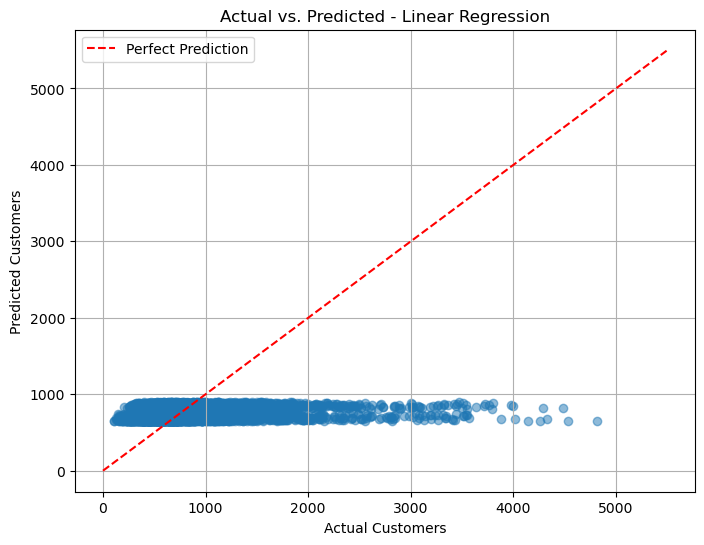

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Customers')
plt.ylabel('Predicted Customers')
plt.title('Actual vs. Predicted - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

The model explains that 3.4% of variation in the number of customers. This is very low, which means that the model is not performing well with the current features. Additionally, we can see from the visualization scatter plot that the fots are far from the line, which in this case means poor prediction of the model/performance. 
Therefore, we should try with other models like Decision Tree, KNN or Random Forest. 

KNN Model

1. Importing the necessary KNN libraries

In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

2. As we are going to use a different model, we need to Initialize and train the KNN model 

In [102]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

3. We´ll do similar to liniar regression. Make predictions on the test set and evaluate the R2 score

In [103]:
y_pred_knn = knn_model.predict(X_test)

In [104]:
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R² score (KNN): {r2_knn:.4f}")

R² score (KNN): 0.7879


This R2 score is not that bad. It´s better than the liniar regression. We´ll test other models to see which one is the best one. 

4. We´ll visualize it to see if the model works well

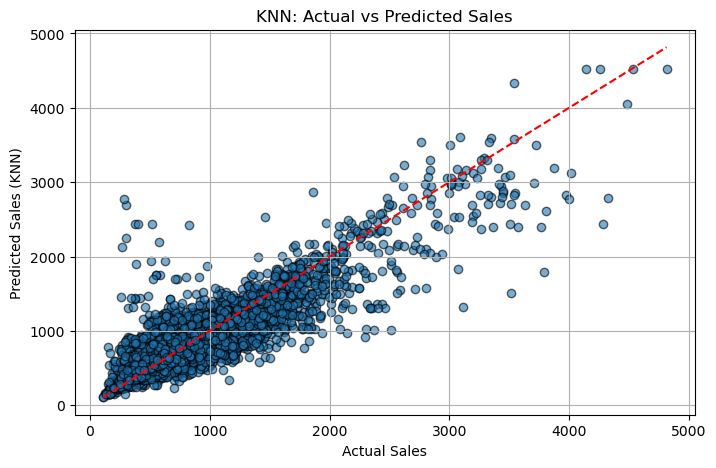

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors='k')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (KNN)')
plt.title('KNN: Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.show()

RANDOM FOREST MODEL

1. Importing the necessary libraries

In [108]:
from sklearn.ensemble import RandomForestRegressor

2. Initialize the model 

In [109]:
rf_model = RandomForestRegressor(random_state=42)

3. Training the model & testing

In [110]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [111]:
y_pred_rf = rf_model.predict(X_test)

4. Evaluate R2 score

In [112]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² score (Random Forest): {r2_rf:.4f}")

R² score (Random Forest): 0.8930


5. Visualization

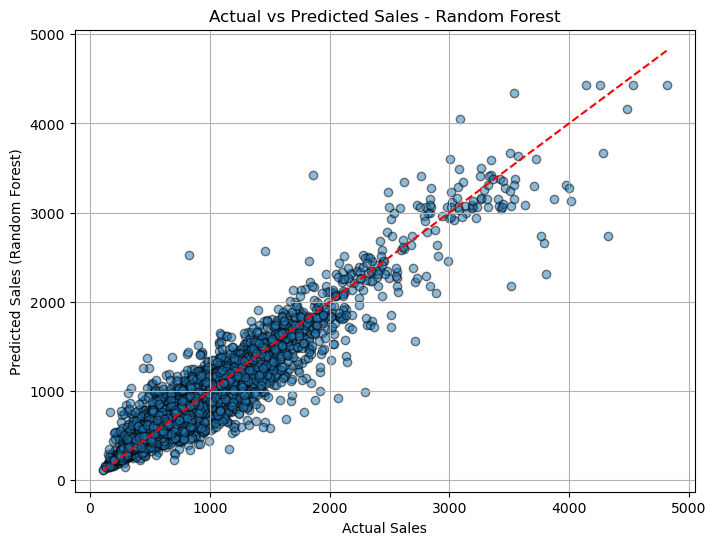

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Random Forest)")
plt.title("Actual vs Predicted Sales - Random Forest")
plt.grid(True)
plt.show()

Table representing the 3 R2 score

In [114]:
import pandas as pd

r2_table = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Random Forest'],
    'R2 Score': [0.0342, 0.81, r2_rf]
})

print(r2_table)

               Model  R2 Score
0  Linear Regression  0.034200
1                KNN  0.810000
2      Random Forest  0.893032


We can clearly see that Random Forest has the best R2 score. Additionally on the visualization above, we can see that the dots are allocated and distributed in a positive and balanced way vs KNN for example. 

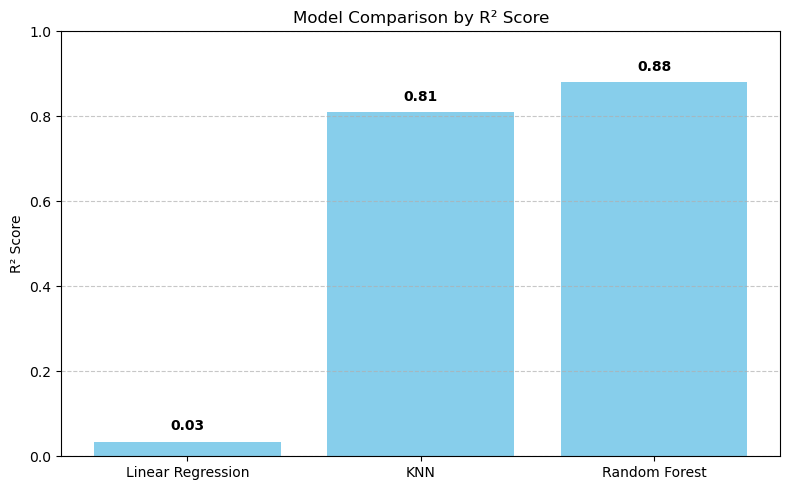

In [115]:
import matplotlib.pyplot as plt
models = ['Linear Regression', 'KNN', 'Random Forest']
r2_scores = [0.0342, 0.81, 0.88]
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('Model Comparison by R² Score')
for bar, score in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
